<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 5: Data Processing & Cleaning for Data Science: Data Ingestion and Wrangling with Pandas

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Ingestion and Wrangling with Pandas. It provides a set of practical Training challenges that allow grasping the different concepts presented in the lecture 5.

## Challenge 1
1. Connect to the `chinook.db` sqlite3 database available in the folder data.
2. Find the genre names with the longest average song length.

`Hint:`
join the tables with the genre name and song length and use the SQLite aggregate
function for the average along with a GROUP BY clause.


In [1]:
#Your Solution here
import sqlite3
import pandas as pd

connection = sqlite3.connect(r"C:\Users\saidi\SEDS_Lab5\data\chinook.db")
cursor = connection.cursor()

sql_query = """
SELECT name FROM sqlite_master WHERE type='table';
"""

pd.read_sql_query(sql_query,connection)

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


In [2]:
sql_query = """
            select g.name, avg(t.Milliseconds) as avg 
            from genres g, tracks t 
            where g.GenreId=t.GenreId
            group by g.name
            order by avg desc limit 5
            """
pd.read_sql_query(sql_query,connection)

,Name,avg
0,Sci Fi & Fantasy,2.911783e+06
1,Science Fiction,2.625549e+06
2,Drama,2.575284e+06
3,TV Shows,2.145041e+06
4,Comedy,1.585264e+06


## Challenge 2: Ingesting, Wrangling and Analyzing  iTune data

You've started a new data science position at the iTune department at Apple Company. 
The department wants to build, test, and evaluate new machine learning recommendation song models using a different source of data: in Excel file, in a csv file, and in the chinook.db SQLite database. They want you proceed with the data ingsestion and data wrangling procedures to provide a clean dataset to be used later for their machine learning based recommendation songs models.  

1. They particlarly asked you to load, clean, and analyze, and then deliver your results to the executive team and president.
You should deliver a small summary of your EDA work from pandas and save your cleaned and prepared data as a new Excel file. The data files are `chinook_data.xlsx`, `chinook_data.csv`, and `chinook.db` on the data folder existed within this notebook.

`Hint:`
1. Follow the procedures in Lecture 5 - Slides: 13-17 - For data ingestion (Data loading from different sources).

2. Follow and test the procedures in Lecture 5 - Slides:18-22 - For Basic Exploratory Data Analysis (EDA).

3. Follow and test the procedures in Lecture 5 - Slides:23-27 - For Basic Data Cleaning Operations.

4. To save your cleaned dataset in an excel file use the pandas built-in method: `pandas.DataFrame.to_excel`.


In [3]:
#Your Solution here

import sqlite3

connection = sqlite3.connect('data\chinook.db')
cursor = connection.cursor()

query = """SELECT tracks.name as Track,
tracks.composer,
tracks.unitprice,
genres.name as Genre,
albums.title as Album,
artists.name as Artist
FROM tracks
JOIN genres ON tracks.genreid = genres.genreid
JOIN albums ON tracks.albumid = albums.albumid
JOIN artists ON albums.artistid = artists.artistid;
"""

import pandas as pd
sql_df = pd.read_sql_query(query, connection)
sql_df.head()

,Track,Composer,UnitPrice,Genre,Album,Artist
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC


In [4]:
csv_df = pd.read_csv('data/chinook_data.csv')
csv_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [5]:
xlsx_df = pd.read_excel("data/chinook_data.xlsx")
xlsx_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,6022698,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
1,Be Quick Or Be Dead,Bruce Dickinson/Janick Gers,204512,8181888,0.99,Rock,Fear Of The Dark,Iron Maiden
2,Água E Fogo,Chico Amaral/Edgard Scandurra/Samuel Rosa,278987,9272272,0.99,Rock,Maquinarama,Skank
3,Ozone Baby,"Jimmy Page, Robert Plant",215954,7079588,0.99,Rock,Coda,Led Zeppelin
4,Bop Boogie,NaN,189596,6093124,0.99,Jazz,Up An' Atom,Gene Krupa


In [6]:
itunes_df = pd.concat([sql_df, csv_df, xlsx_df])
itunes_df

,Track,Composer,UnitPrice,Genre,Album,Artist,Milliseconds,Bytes
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN
...,...,...,...,...,...,...,...,...
210,Black Dog,John Paul Jones/Robert Plant,0.99,Rock,BBC Sessions [Disc 2] [Live],Led Zeppelin,317622.0,10267572.0
211,Abandoned,NaN,1.99,TV Shows,"Lost, Season 2",Lost,2587041.0,537348711.0
212,Hey Hey,Big Bill Broonzy,0.99,Blues,Unplugged,Eric Clapton,196466.0,6543487.0
213,Everlong,Dave Grohl,0.99,Rock,The Colour And The Shape,Foo Fighters,250749.0,8270816.0


In [7]:
itunes_df.shape

(4021, 8)

In [8]:
itunes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4021 entries, 0 to 214
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         4021 non-null   object 
 1   Composer      2908 non-null   object 
 2   UnitPrice     4021 non-null   float64
 3   Genre         4021 non-null   object 
 4   Album         4021 non-null   object 
 5   Artist        4021 non-null   object 
 6   Milliseconds  518 non-null    float64
 7   Bytes         518 non-null    float64
dtypes: float64(3), object(5)
memory usage: 282.7+ KB


In [9]:
'**not null :**',itunes_df.notna().sum(),'**null :**',itunes_df.isna().sum(),

('**not null :**',
 Track           4021
 Composer        2908
 UnitPrice       4021
 Genre           4021
 Album           4021
 Artist          4021
 Milliseconds     518
 Bytes            518
 dtype: int64,
 '**null :**',
 Track              0
 Composer        1113
 UnitPrice          0
 Genre              0
 Album              0
 Artist             0
 Milliseconds    3503
 Bytes           3503
 dtype: int64)

In [10]:
itunes_df.describe()

,UnitPrice,Milliseconds,Bytes
count,4021.000000,5.180000e+02,5.180000e+02
mean,1.050184,3.868336e+05,3.040734e+07
std,0.237857,5.258469e+05,9.602387e+07
min,0.990000,4.884000e+03,1.612660e+05
25%,0.990000,2.049758e+05,6.493416e+06
50%,0.990000,2.526950e+05,8.098298e+06
75%,0.990000,3.225330e+05,1.010645e+07
max,1.990000,2.935894e+06,5.701522e+08


In [11]:
itunes_df.corr()

C:\Users\saidi\AppData\Local\Temp\ipykernel_15544\3823816565.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  itunes_df.corr()


,UnitPrice,Milliseconds,Bytes
UnitPrice,1.000000,0.956721,0.941954
Milliseconds,0.956721,1.000000,0.942266
Bytes,0.941954,0.942266,1.000000


In [12]:
itunes_df['Genre'].mode()

0    Rock
Name: Genre, dtype: object

In [13]:
itunes_df['Genre'].value_counts()

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
TV Shows               105
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Sci Fi & Fantasy        31
Heavy Metal             31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: Genre, dtype: int64

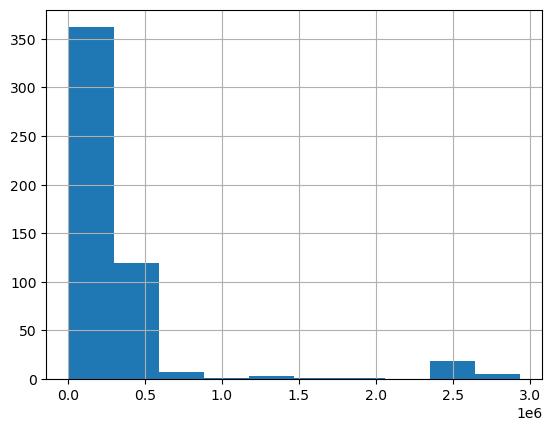

In [14]:
import matplotlib.pyplot as plt

itunes_df['Milliseconds'].hist()
plt.show()

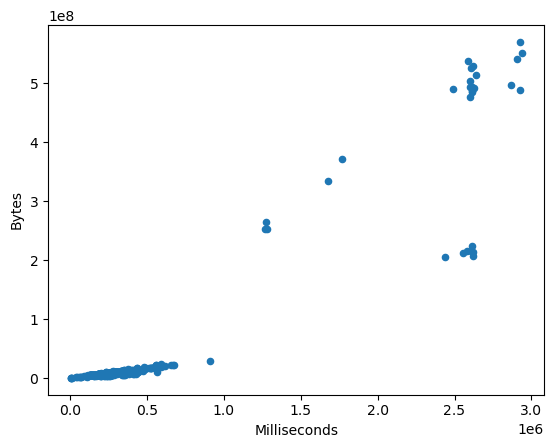

In [15]:
itunes_df.plot.scatter(x='Milliseconds',
y='Bytes')
plt.show()

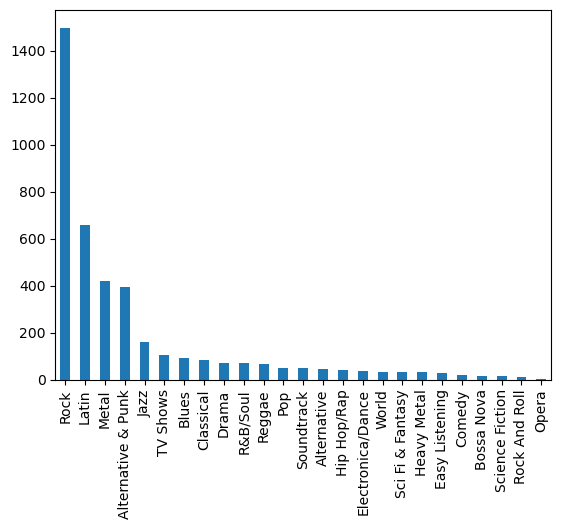

In [16]:
itunes_df['Genre'].value_counts().plot.bar()
plt.show()

In [17]:
itunes_df.drop('Composer', axis=1, inplace=True)
itunes_df.columns

Index(['Track', 'UnitPrice', 'Genre', 'Album', 'Artist', 'Milliseconds',
       'Bytes'],
      dtype='object')

In [18]:
only_music = itunes_df[~itunes_df['Genre'].isin(['Drama', 'TV Shows', 'SciFi & Fantasy', 'Science Fiction', 'Comedy'])]
only_music

,Track,UnitPrice,Genre,Album,Artist,Milliseconds,Bytes
0,For Those About To Rock (We Salute You),0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN
1,Put The Finger On You,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN
2,Let's Get It Up,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN
3,Inject The Venom,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN
4,Snowballed,0.99,Rock,For Those About To Rock We Salute You,AC/DC,NaN,NaN
...,...,...,...,...,...,...,...
209,Black Diamond,0.99,Rock,Greatest Kiss,Kiss,314148.0,10266007.0
210,Black Dog,0.99,Rock,BBC Sessions [Disc 2] [Live],Led Zeppelin,317622.0,10267572.0
212,Hey Hey,0.99,Blues,Unplugged,Eric Clapton,196466.0,6543487.0
213,Everlong,0.99,Rock,The Colour And The Shape,Foo Fighters,250749.0,8270816.0


In [19]:
itunes_df.dropna(thresh=2, inplace=True)
itunes_df.isna().sum(), itunes_df.shape

(Track              0
 UnitPrice          0
 Genre              0
 Album              0
 Artist             0
 Milliseconds    3503
 Bytes           3503
 dtype: int64,
 (4021, 7))

In [20]:
itunes_df['Composer'].fillna('Unknown', inplace=True)
(itunes_df['Composer'] =='Unknown').sum()

KeyError: 'Composer'

In [ ]:
itunes_df.drop_duplicates(inplace=True)
itunes_df.duplicated().sum()

In [ ]:
itunes_df.isna().sum()


In [ ]:
# itunes_df['Milliseconds'] = itunes_df['Milliseconds'].astype('int') 

In [ ]:
genre_dict = {'metal': 'Metal', 'met': 'Metal'}
itunes_df['Genre'].replace(genre_dict)

In [ ]:
itunes_df['Seconds'] = itunes_df['Milliseconds'] / 1000
itunes_df

In [ ]:
itunes_df.to_excel('output.xlsx')

## Challenge 3: Ingesting, Wrangling and Analyzing Bitcoin price data


You have just joined a financial company as a new data scientist. The company is  interested in the Bitcon market and you are working with a team that aims to ingest data and then clean, and analyse the final dataset to be used later to build and evaluate machine learning models for Bitcon Price forecasting.

The company is working with two datasets coming from two different sources and is only interested in the `BTCUSD` currency: 
1. One dataset is json file locally existed in the data folder: `bitcoin_price.json`. This file contains data up to `2020-11-27`
2. The other uses a real time data flow that comes from yahoo finance api service. The company wants to collect real time data beginning from `2020-11-28` to `2022-10-31`.

You are asked to do the required checklist procedures and operations to load, clean, and analyse, and then deliver your results to the executive team with providing a short summaray of your prelimanary EDA work from pandas and save the cleaner dataset as a new csv file. 
Note that the 

`Hint:`

1. To load a json file into a dataframe use the snipet code below:

```python
import json

with open('<path_to_your_json_file>') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
```

This code uses the `json` built-in python module to open a json file and load it in an object data. Then we use the `from_dict()` pandas method to transform the json data into a DataFrame.

2. To get real time data flow from the yahoo finance api sevice we will use the `yfinance` module. 
    * So, first install the module in your environment using  `conda install yfinance`.
    * Then use the code below to get real data. Test with the periode from `2020-11-28` to `2022-10-31`.

```python
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='<start_date>', # The starting date
                   end='<end_date>', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )
```

3. Get a look of the two DataFrames and see what are the common columns and what differ one to another.
    * You will notice that the  json DataFrame is indexed numericaly wherease the yahoo DataFrame is indexed by Date. So, you have to uniform the index for both DataFrames. In this case we will change the json DataFrame  index by Date.
        1. To do that, first rename the column `time` to `Date` by using the built-in pandas method: `rename()` as follows:
        
        ```python
        rename(columns ={'<old_col_name>':'<new_col_name>'}, inplace = True)
         ```
         
        2. What is the datatype of the new Date column in the json DataFrame?
            * You will notice that it is a `datetime64[ns]` datatype, which means the number of seconds since 1-1-1970. To make it date fomat like the yahoo DataFrame, convert the column to a pandas datetime datatype by using the following code: 
         
          ```python
              btc_df['<column_name>'] = pd.to_datetime(btc_df['<column_name>'], unit='ms')
          ```
         
        3. To change the index of your dataframe use the `set_index` built-in pandas function:
        ```python
              set_index('<column_name>', inplace=True)
        ```
            * The remaining common columns labels in both DataFrames are not uniformed. The json DataFrame uses lowercase strings,  while the yahoo DataFrame uses a first letter world uppercase string.
                  1. Change the column labels of the yahoo DataFrame to lowercase strings. Adjust the following code accordingly:
             ```python
                data_frame.columns= data_frame.columns.str.lower()
             ```
             
4. Concatenate the two dataframe into one dataset.
5. Do The basic EDA cheklist procedures on the resulting dataset:
   * Do few time series plots: 
       * open, close, high, low, volume with regards to Date
   * Print the correlation matrix.
6. Do the General Data Cleaning Checklist operations to see if ther is still cleaning operations to accomplish.
    * Most particularly, you will notice a NaN values in both `adj close` and `symbole` columns. What is your suggestion to deal with this missing values given that the company is not interest at all on the `adj close` data. 	
7. Save your cleaner dataframe into a csv file.
    * Use the `pandas.DataFrame.to_csv` method.
             

In [ ]:
#Your Solution
import json
import pandas as pd

with open("data/bitcoin_price.json") as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
btc_df_jsn.count()

In [ ]:
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='2020-11-28', # The starting date
                   end='2022-10-31', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )

In [ ]:
btc_yf_df

In [ ]:
btc_df_jsn

In [ ]:
btc_df_jsn.rename(columns ={'time':'Date'}, inplace = True)
btc_df_jsn['Date'].dtype

In [ ]:
btc_df_jsn['Date'] = pd.to_datetime(btc_df_jsn['Date'], unit='ms')
btc_df_jsn['Date'].dtype

In [ ]:
btc_df_jsn.set_index('Date', inplace=True)

In [ ]:
btc_yf_df.columns = btc_yf_df.columns.str.lower()
btc_yf_df

In [ ]:
new_btc_df = pd.concat([btc_df_jsn,btc_yf_df])
new_btc_df

In [ ]:
import matplotlib.pyplot as plt

new_btc_df['high'].hist()
plt.show()

In [ ]:
new_btc_df.drop('adj close', axis=1, inplace=True)

In [ ]:
new_btc_df['symbol'].fillna(new_btc_df['symbol'].value_counts().index[0], inplace=True)

In [ ]:
new_btc_df

In [ ]:
new_btc_df['low'][::150].plot.bar()
plt.show()

In [ ]:

new_btc_df['high'][::150].plot.bar()
plt.show()